# DSND Project 4: An insight on Seattle’s Airbnb by Kaggle

## Investigating business requirements

The Seattle AirBnB websitw Dataset consists data about AirBnB website listing in Seattle, WA. Listing such as avalibility time for the listings, pricings and reviews and ratings. To be alighned with the Rubic we will seek to answer the following business questions:

**What do the reviews data mean? and what can you understand from them?**

Things we need to consider the following:
1. Explore the best/ worst reviews 
2. Rank reviews and understand rankings 
3. Categorize reviews based on postives and negatives 
4. Explore review neighberhood to find patterns
5. Overall, conduct a sentiment(postive/negative reviews) anaysis.

**What are the latest pricing trends? are there certain peak seasons?**

Things we need to consider the following:
1. Study the seasons and find the peak season 
2. inspect prices increase/decrease per season


**Can you predict future pricings?**

Things we need to consider the following:
1. investigate pricing increace/decrease pattern 
2. Correlate pricing factors


So, we will take you on a data journey where we understand data, preprocess it and later do our model magic ~ 
lets go 


### Getting to know our data
Lets start by understanding the dataset we have and getting more insight

In [502]:
# first off as with every project we start with import statments 
# lets import packages we need for this project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import copy
import nltk
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import f1_score, r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from IPython import display
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline


In [431]:
# lets import the CSV files 
calendar_df = pd.read_csv("calendar.csv")
listings_df = pd.read_csv("listings.csv")
reviews_df = pd.read_csv("reviews.csv")

In [432]:
# lets expolore imported files 
print("Calender Data")
print("---------")
calendar_df.head()

Calender Data
---------


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [433]:
print("Data rows/columns")
print(calendar_df.shape)

Data rows/columns
(1393570, 4)


In [434]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [435]:
# our data seems to have NaN, lets assess null values
print("Null values in calender dataframe")
nulls = calendar_df.isnull().sum()
nulls[nulls > 0].sort_values(ascending=False)
nulls

Null values in calender dataframe


listing_id         0
date               0
available          0
price         459028
dtype: int64

#### Conclusion: 
This Dataset needs to be cleansed. As we can see pricing has missing data this could be possibly impacted by weekends or seasonal holidays. 

In [436]:
print("Listing Data")
print("---------")
listings_df.head()

Listing Data
---------


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [437]:
print("Data rows/columns")
print(listings_df.shape)

Data rows/columns
(3818, 92)


In [438]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [439]:
# our data seems to have NaN, lets assess null values
print("Null values in listing dataframe")
nulls = listings_df.isnull().sum()
nulls[nulls > 0].sort_values(ascending=False)
nulls

Null values in listing dataframe


id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

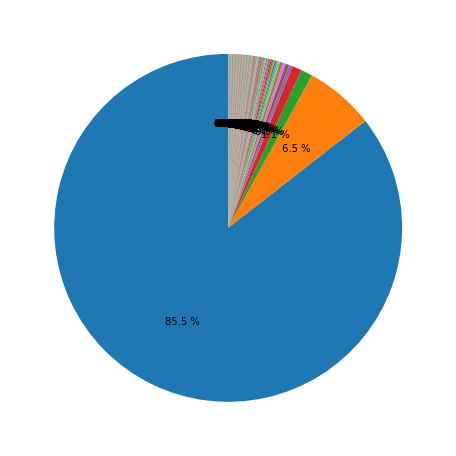

Seattle, Washington, United States                             3259
US                                                              246
Spokane, Washington, United States                               41
Kent, Washington, United States                                  34
Los Angeles, California, United States                           13
Bellevue, Washington, United States                              12
San Francisco, California, United States                         11
Mercer Island, Washington, United States                         10
Kirkland, Washington, United States                               8
New York, New York, United States                                 6
Shoreline, Washington, United States                              5
Sammamish, Washington, United States                              5
Seattle                                                           5
Vashon, Washington, United States                                 5
Vancouver, Washington, United States            

In [440]:
# we notice some categorical data lets explore them
# lets select the following values to explore for this project
#host_location, property_type, host_response_time, host_response_rate

plt.figure(figsize =(8, 8)) 
plt.pie(listings_df['host_location'].value_counts(),
startangle = 90, autopct ='%.1f %%')
plt.show() 

listings_df['host_location'].value_counts(ascending=False)

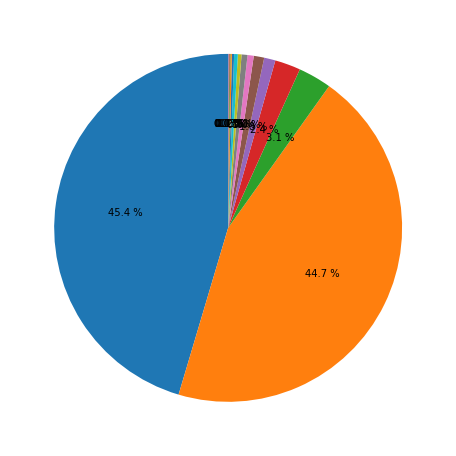

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [441]:
# we notice some categorical data lets explore them
# lets select the following values to explore for this project
#host_location, property_type, host_response_time, host_response_rate

plt.figure(figsize =(8, 8)) 
plt.pie(listings_df['property_type'].value_counts(),
startangle = 90, autopct ='%.1f %%')
plt.show() 

listings_df['property_type'].value_counts(ascending=False)

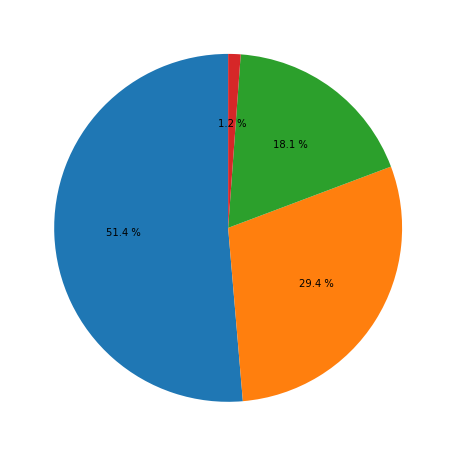

within an hour        1692
within a few hours     968
within a day           597
a few days or more      38
Name: host_response_time, dtype: int64

In [442]:
# we notice some categorical data lets explore them
# lets select the following values to explore for this project
#host_location, property_type, host_response_time, host_response_rate

plt.figure(figsize =(8, 8)) 
plt.pie(listings_df['host_response_time'].value_counts(),
startangle = 90, autopct ='%.1f %%')
plt.show() 

listings_df['host_response_time'].value_counts(ascending=False)

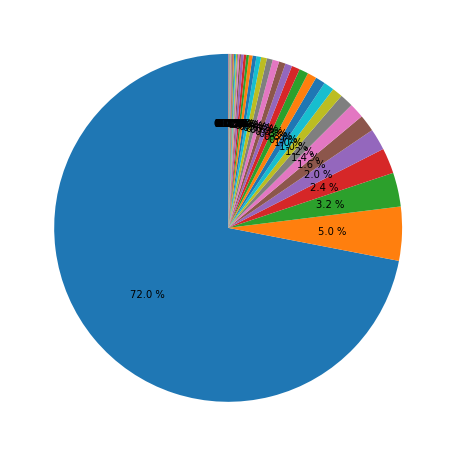

100%    2371
90%      165
80%      104
99%       78
88%       66
50%       52
94%       46
67%       41
89%       32
75%       32
86%       30
98%       28
96%       28
70%       25
97%       21
83%       20
60%       20
92%       18
93%       18
33%       14
40%       12
63%       11
95%        8
71%        8
78%        8
91%        5
43%        4
25%        3
87%        3
76%        3
64%        3
17%        2
82%        2
57%        2
58%        2
30%        1
38%        1
56%        1
31%        1
81%        1
68%        1
55%        1
65%        1
53%        1
69%        1
Name: host_response_rate, dtype: int64

In [443]:
# we notice some categorical data lets explore them
# lets select the following values to explore for this project
#host_location, property_type, host_response_time, host_response_rate

plt.figure(figsize =(8, 8)) 
plt.pie(listings_df['host_response_rate'].value_counts(),
startangle = 90, autopct ='%.1f %%')
plt.show() 

listings_df['host_response_rate'].value_counts(ascending=False)

#### Conclusion:

Exploring the data it needs to cleaned.concluding the categorical value evaluation we conclude the following:
1. Seattle is the most frequent location
2. House , Apartment, Townhouse were among the frequesnt selected properties 
3. We have a quick response time (of an hour) which is the fastest responce time
4. As for the response rate the majority of the rates read to a 100% 

In [444]:
print("reviews Data")
print("---------")
reviews_df.head()

reviews Data
---------


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [445]:
print("Data rows/columns")
print(reviews_df.shape)

Data rows/columns
(84849, 6)


In [446]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
listing_id       84849 non-null int64
id               84849 non-null int64
date             84849 non-null object
reviewer_id      84849 non-null int64
reviewer_name    84849 non-null object
comments         84831 non-null object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [447]:
# our data seems to have NaN, lets assess null values
print("Null values in listing dataframe")
nulls = reviews_df.isnull().sum()
nulls[nulls > 0].sort_values(ascending=False)
nulls

Null values in listing dataframe


listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

#### Conclusion:

Exploring the data we notice that the review dataset has 6 columns. and the only missing values can be found in the comments section. 
This is likely due to the fact that the comment section was left as optional for the users.

### Scrub-a-dub-dub, Its data cleaning time!
In this step we will clean our data from these NaNs and preprocess it in order to help us answer our business questions.

In [448]:
# Since our first business questions is about reviews
# We'll start by preprocessing the review data 
# lets shrink our dataframe to get only the columns we are interested in

rdf = reviews_df[['listing_id','date','comments']].copy()

In [449]:
rdf.head()

,listing_id,date,comments
0,7202016,2015-07-19,Cute and cozy place. Perfect location to every...
1,7202016,2015-07-20,Kelly has a great room in a very central locat...
2,7202016,2015-07-26,"Very spacious apartment, and in a great neighb..."
3,7202016,2015-08-02,Close to Seattle Center and all it has to offe...
4,7202016,2015-08-10,Kelly was a great host and very accommodating ...


In [450]:
#lets build a function to map neighbourhood to comments using listing ID
# exploring the CSV file in excel we notice that neighbourhood field has some (Blanks)
# We will analyze the cleansed version 

def map_neighbourhood(lid):
    nbr = listings_df.loc[listings_df['id']== lid, 'neighbourhood_cleansed' ].iloc[0]
    return nbr

In [451]:
# testing time~ 
# lets test our function using a listing id randomly selected from the excel file 
# in the excel sheet select row 1026 with id 8103432
map_neighbourhood(8103432)

'Atlantic'

In [452]:
#lets implement function and join tables
rdf['neighbourhood_cleansed'] = rdf['listing_id'].apply(map_neighbourhood)
rdf.head()

,listing_id,date,comments,neighbourhood_cleansed
0,7202016,2015-07-19,Cute and cozy place. Perfect location to every...,Lower Queen Anne
1,7202016,2015-07-20,Kelly has a great room in a very central locat...,Lower Queen Anne
2,7202016,2015-07-26,"Very spacious apartment, and in a great neighb...",Lower Queen Anne
3,7202016,2015-08-02,Close to Seattle Center and all it has to offe...,Lower Queen Anne
4,7202016,2015-08-10,Kelly was a great host and very accommodating ...,Lower Queen Anne


In [453]:
#lets check for nulls 
rdf['neighbourhood_cleansed'].isnull().sum()

0

In [454]:
# sentiement intensity analyzer 
# we will use sentiement intensity analyzer to get an overall score of neg/pos/neu comments
# we will do so with using sentiment analyzer on the variaible polarity score
import nltk
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [455]:
def apply_sia(cmt):
    
    '''
    Mhhhhmmm... a quick explaination of how this function should work
    Input: Review comments (Text Data)
    Output: A score combining pos/neg/neu scores 
    Function: Applying sentiment analyzer on comments using polarity_score
    '''
    txt= str(cmt)
    total = sia.polarity_scores(txt)
    return total['compound']

In [456]:
rdf['polarity_score'] = rdf['comments'].apply(apply_sia)
rdf.head()

,listing_id,date,comments,neighbourhood_cleansed,polarity_score
0,7202016,2015-07-19,Cute and cozy place. Perfect location to every...,Lower Queen Anne,0.7901
1,7202016,2015-07-20,Kelly has a great room in a very central locat...,Lower Queen Anne,0.9872
2,7202016,2015-07-26,"Very spacious apartment, and in a great neighb...",Lower Queen Anne,0.8718
3,7202016,2015-08-02,Close to Seattle Center and all it has to offe...,Lower Queen Anne,0.8313
4,7202016,2015-08-10,Kelly was a great host and very accommodating ...,Lower Queen Anne,0.9783


In [457]:
# Now since we have our scores lets compare the sentimants 
# Positive means > 0 
# Negative means < 0 
# Neutral means = 0 
# Lets get get scores and look at the analysis
pos = rdf['polarity_score'][rdf['polarity_score'] > 0]
neg= rdf['polarity_score'][rdf['polarity_score'] < 0]
neu= rdf['polarity_score'][rdf['polarity_score'] ==0]


In [458]:
print('Positive comments are: ', pos.count())
print('Negative comments are: ', neg.count())
print('Neutral comments are', neu.count())

Positive comments are:  82444
Negative comments are:  849
Neutral comments are 1556


In [459]:
# interesting our positive cooments seem to out weigh the negative ones
# carrying on, we'll join neghberhoods based on polarity score

polarity_neigh = rdf.groupby('neighbourhood_cleansed')[['polarity_score']].mean().sort_values(by='polarity_score',ascending=False)

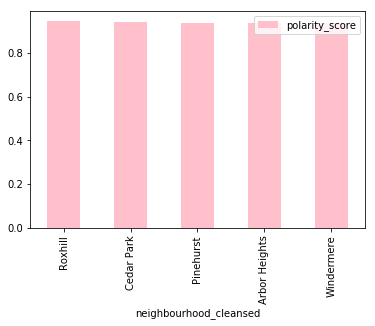

In [460]:
# lets visulize our results seeing the top 5 neighberhoods based on comments
polarity_neigh.head(5).plot(kind='bar', color="pink")

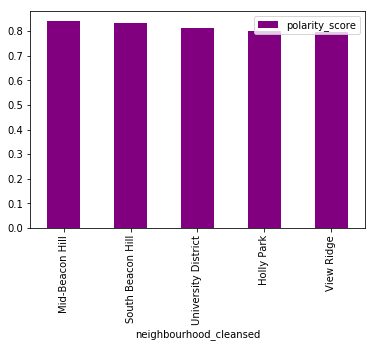

In [461]:
# now, lets visulize our results seeing the least 5 neighberhoods based on comments
polarity_neigh.tail(5).plot(kind='bar', color="purple")

##### Conclusion:

Well looking at our sentiement analysis we noticed that most of the comments were positive comments. and if we seek to know the best neighberhoods based on our comments we conclude that Roxhill, Cedar Park and Pinehurst are the top 3 while Mid-Beacon Hill, South Beacon Hill and University District are the 3 lowest rated neighberhoods based on our analysis of their reviews.

In [462]:
# now lets explore our second business requirement which was about pricing trends 
#pricing trends, we'll checkout pricing trends per neighberhood and per month 
# lets get started 
# lets find the average price of listings per neighberhoods
# lets remove dollar sign from data and convert to float
listings_df['price'] = listings_df['price'].replace('[\$,]', '', regex=True).astype(float)
price_mean = listings_df.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False)
print(price_mean)

                                price
neighbourhood_cleansed               
Southeast Magnolia         231.705882
Portage Bay                227.857143
Westlake                   194.470588
West Queen Anne            187.769231
Montlake                   182.789474
Briarcliff                 176.571429
Sunset Hill                176.055556
Industrial District        173.333333
Alki                       171.619048
Windermere                 169.900000
Pioneer Square             169.260870
Central Business District  164.213592
Fauntleroy                 164.100000
Belltown                   162.893162
East Queen Anne            159.414634
Madrona                    158.234043
Pike-Market                157.785714
North Queen Anne           150.240741
Green Lake                 149.018519
Lawton Park                147.566667
Holly Park                 147.166667
North Admiral              146.408163
View Ridge                 139.000000
Lower Queen Anne           138.202128
First Hill  

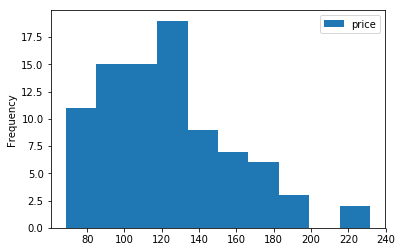

In [463]:
#lets visualize our findings
listings_df.groupby(['neighbourhood_cleansed'])[['price']].mean().plot(kind ='hist')

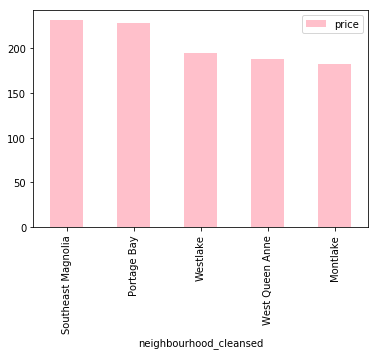

In [464]:
# as we did with our reviews dataset lets get the top 5 pricy neighberhoods
#and the top 5 cheapest 
pricy = listings_df.groupby(['neighbourhood_cleansed'])[['price']].mean().sort_values(by='price',ascending=False)
pricy.head(5).plot(kind='bar', color="pink")

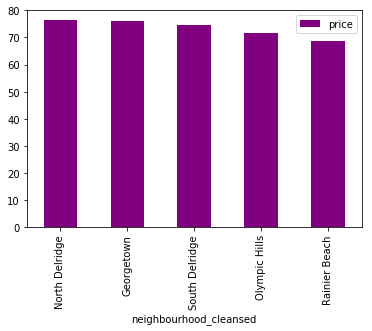

In [465]:
#top 5 cheapest neigberhoods??
pricy.tail(5).plot(kind='bar', color="purple")

In [466]:
# now lets check out our data per year/month
calendar_df['year'] = pd.DatetimeIndex(calendar_df['date']).year
calendar_df['month'] = pd.DatetimeIndex(calendar_df['date']).month
# remove dollar sign from data and convert to float
calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)

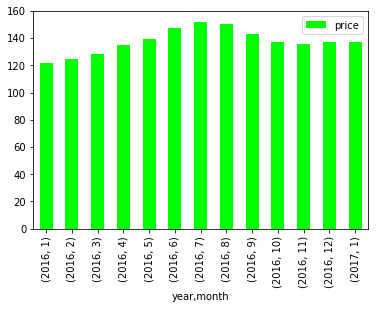

In [467]:
calendar_df.groupby(['year','month'])[['price']].mean().plot(kind="bar", color= "lime")

##### Conclusion:

Well looking at our analysis we note that the top 3 most expenssive neighberhoods are SouthEast Magnolia(231.70 USD), Portage Bay(227.85 USD) and Westlake(194.47 USD) . While our cheapest are South Delridge(74.66 USD),Olympic Hills (71.68 USD) and the cheapest neighberhood: Rainier Beach (68.55 USD). 
and looking at the price range per month, we can tell business is at its peak during summertime (June, July and August) and becomes really slow during wintertime(January, Febuary).

In [468]:
# now moving on to our final business requirments 
# our ability to find pattern and pridict future prices 
#lets start
# first lets find columns with NaNs 
listings_df.columns[listings_df.isnull().all()].tolist()

['license']

In [469]:
#seeing that the license column doesnt impact price lets drop it
#but first lets copy this dataframe and work on it 
pdf = listings_df.copy()
pdf = pdf.drop('license', axis=1)

In [470]:
# lets review missing data for numerical values
cnt_cols = pdf.select_dtypes(include=['float', 'int']).columns
for i in cnt_cols:
    print(i, pdf[i].isnull().sum())

host_listings_count 2
host_total_listings_count 2
latitude 0
longitude 0
bathrooms 16
bedrooms 6
beds 1
square_feet 3721
price 0
review_scores_rating 647
review_scores_accuracy 658
review_scores_cleanliness 653
review_scores_checkin 658
review_scores_communication 651
review_scores_location 655
review_scores_value 656
reviews_per_month 627


In [471]:
# looking at our missing data we will use binary filling for the missing data
# we will use 0 and 1 to fill in NaNs
# data regarding hosting only two data are missing so we will fill NaNs with 1
# Since the min value for a bathrooms and bedrooms is zero we will fill NaN with 0
# Since the min value for beds is 1 we will fill NaN with 1
# As for the Square_feet column it has alot of NaNs and is irrelevent to our analysis so lets drop it 
# as for all review based columns since the min data is 0 we will fill them with 0

#lets excute our plan 
# Team zero fill 
pdf['bathrooms'] = pdf['bathrooms'].fillna(0)
pdf['bedrooms'] = pdf['bedrooms'].fillna(0)
r_zero = ['review_scores_rating' ,
'review_scores_accuracy' ,
'review_scores_cleanliness' ,
'review_scores_checkin' ,
'review_scores_communication' ,
'review_scores_location' ,
'review_scores_value' ,
'reviews_per_month']
# loop through and zero all them NaNs
for i in r_zero:
    pdf[i] = pdf[i].fillna(0)

# Team one fill
pdf['beds'] = pdf['beds'].fillna(1)
hosts = ['host_listings_count' ,
'host_total_listings_count' ]
for h in hosts:
    pdf[h] = pdf[i].fillna(1)
    
# drop drop
pdf = pdf.drop('square_feet',axis=1)

In [472]:
# now lets check that all our numerical NaNs have been filled
cnt_cols = pdf.select_dtypes(include=['float', 'int']).columns
for i in cnt_cols:
    print(i, pdf[i].isnull().sum())

host_listings_count 0
host_total_listings_count 0
latitude 0
longitude 0
bathrooms 0
bedrooms 0
beds 0
price 0
review_scores_rating 0
review_scores_accuracy 0
review_scores_cleanliness 0
review_scores_checkin 0
review_scores_communication 0
review_scores_location 0
review_scores_value 0
reviews_per_month 0


In [473]:
# looking good! now lets see categorical data
cnt_cate = pdf.select_dtypes(include=['object']).columns
for i in cnt_cate:
    print(i, pdf[i].isnull().sum())

listing_url 0
last_scraped 0
name 0
summary 177
space 569
description 0
experiences_offered 0
neighborhood_overview 1032
notes 1606
transit 934
thumbnail_url 320
medium_url 320
picture_url 0
xl_picture_url 320
host_url 0
host_name 2
host_since 2
host_location 8
host_about 859
host_response_time 523
host_response_rate 523
host_acceptance_rate 773
host_is_superhost 2
host_thumbnail_url 2
host_picture_url 2
host_neighbourhood 300
host_verifications 0
host_has_profile_pic 2
host_identity_verified 2
street 0
neighbourhood 416
neighbourhood_cleansed 0
neighbourhood_group_cleansed 0
city 0
state 0
zipcode 7
market 0
smart_location 0
country_code 0
country 0
is_location_exact 0
property_type 1
room_type 0
bed_type 0
amenities 0
weekly_price 1809
monthly_price 2301
security_deposit 1952
cleaning_fee 1030
extra_people 0
calendar_updated 0
has_availability 0
calendar_last_scraped 0
first_review 627
last_review 627
requires_license 0
jurisdiction_names 0
instant_bookable 0
cancellation_policy 0
re

In [474]:
# we notice we have some columns with missing data lets do some filling magic
# we will do the following for text data~> convert them to boolean to determine if the exist or not
# we will do this to data describing property and host 
# we will drop columns with too many NaNs and not of much use to our analysis
# we will expolre data and convert values that need to be converted and standerize our data (Mainly in cities and states)
# the amenities is an array we will propbly need to breakdown and fill..
# Cleaning challenge accepted lets start

# we will start by converteing text data to boolean 

def text_boolean(txt):
    if not txt:
        return 0
    else:
        return 1
    

In [475]:
txt_array= [
        'summary' , 
        'space' ,
        'neighborhood_overview',
        'notes' ,'transit' ,'thumbnail_url' ,'medium_url' ,
        'xl_picture_url' ,'host_name' ,'host_since' ,'host_location' ,
        'host_about' , 'host_thumbnail_url' , 'host_picture_url' ,
        'host_neighbourhood', 'zipcode' ]
for i in txt_array:
    pdf[i] = pdf[i].apply(text_boolean)

In [476]:
# now lets convert bool to int (1 or 0)

def convert_bool (bl):
    if bl == 't':
        return 1
    else:
        return 0

In [477]:
bl_array = ['host_is_superhost', 
           'host_has_profile_pic' , 'host_identity_verified',
            'has_availability','requires_license',
            'instant_bookable','require_guest_profile_picture'
            ,'require_guest_phone_verification']
for i in bl_array:
    pdf[i] = pdf[i].apply(convert_bool)

In [478]:
# lets fill blacks with the word "unavailable"
# Exploring the data we can conclude that unavailable is denoted by N/A
#to keep data consistent 

pdf['host_response_time'] = pdf['host_response_time'].fillna('N/A')
pdf['host_acceptance_rate'] = pdf['host_acceptance_rate'].fillna('N/A')

# filter and fill host_response_rate , security_deposit, cleaning_fee and extra people
pdf['host_response_rate'] = pdf['host_response_rate'].apply(lambda x: 0 if x == 'N/A'  else x)
pdf['host_response_rate'] = pdf['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
pdf['host_response_rate'] = pdf['host_response_rate'].fillna(0)
pdf['security_deposit'] = pdf['security_deposit'].replace('[\$,]', '', regex=True).astype(float)
pdf['cleaning_fee'] = pdf['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)
pdf['extra_people'] = pdf['extra_people'].replace('[\$,]', '', regex=True).astype(float)
pdf['security_deposit'] = pdf['security_deposit'].fillna(0)
pdf['cleaning_fee'] = pdf['cleaning_fee'].fillna(0)

# lets standerize cities and states 
pdf['state'] = pdf['state'].str.lower()
pdf['city'] = pdf['city'].str.lower()
pdf['city'] = pdf['city'].str.strip()

# drip drop~ lets drop rows/columns we dont need 
# lets drop rows for property types..since its just one record it wont have a big impact
pdf = pdf.dropna(subset=['property_type'], axis=0)

# lets drop columns we dont need
drop_ = ['first_review',
         'last_review','experiences_offered','market',
         'jurisdiction_names', 'weekly_price' ,'monthly_price', 'neighbourhood']
pdf = pdf.drop(drop_, axis=1)

In [479]:
# lets run our NaN code to make sure we cleaned all data
cnt_cate = pdf.select_dtypes(include=['object']).columns
for i in cnt_cate:
    print(i, pdf[i].isnull().sum())

listing_url 0
last_scraped 0
name 0
description 0
picture_url 0
host_url 0
host_response_time 0
host_acceptance_rate 0
host_verifications 0
street 0
neighbourhood_cleansed 0
neighbourhood_group_cleansed 0
city 0
state 0
smart_location 0
country_code 0
country 0
is_location_exact 0
property_type 0
room_type 0
bed_type 0
amenities 0
calendar_updated 0
calendar_last_scraped 0
cancellation_policy 0


In [480]:
# our categorical data is looking good 
# now lets explore amenities and clean them
# as we mentioned earlier, upon investigating we noticed that that amenities are stored as an array 
# lets strip amenities from special characters

amt_array = []
for i , record in pdf.iterrows():
    record['amenities'] = record['amenities'].replace('"','')
    record['amenities'] = record['amenities'].replace('{','')
    record['amenities'] = record['amenities'].replace('}','')
    amt_list = record['amenities'].split(',')
    for x in amt_list:
        amt_array.append(x)
cnt_amt = Counter(amt_array)
cnt_amt.most_common()

[('Wireless Internet', 3666),
 ('Heating', 3626),
 ('Kitchen', 3422),
 ('Smoke Detector', 3280),
 ('Essentials', 3237),
 ('Dryer', 2996),
 ('Washer', 2991),
 ('Internet', 2811),
 ('Shampoo', 2670),
 ('TV', 2574),
 ('Carbon Monoxide Detector', 2485),
 ('Fire Extinguisher', 2196),
 ('Free Parking on Premises', 2166),
 ('Family/Kid Friendly', 1962),
 ('First Aid Kit', 1679),
 ('Cable TV', 1446),
 ('Indoor Fireplace', 885),
 ('Pets live on this property', 882),
 ('Hangers', 846),
 ('Elevator in Building', 785),
 ('Hair Dryer', 774),
 ('Laptop Friendly Workspace', 745),
 ('Iron', 742),
 ('Safety Card', 727),
 ('Air Conditioning', 677),
 ('24-Hour Check-in', 616),
 ('Buzzer/Wireless Intercom', 538),
 ('Dog(s)', 508),
 ('Pets Allowed', 472),
 ('Gym', 442),
 ('Cat(s)', 382),
 ('Hot Tub', 303),
 ('Wheelchair Accessible', 300),
 ('Breakfast', 291),
 ('Suitable for Events', 209),
 ('Pool', 159),
 ('Lock on Bedroom Door', 100),
 ('Doorman', 85),
 ('Smoking Allowed', 82),
 ('Other pet(s)', 50),
 ('

In [481]:
# our ammenties look good! 
# now lets check on the remaining categorical data
pdf.select_dtypes(include = ['object']).columns

Index(['listing_url', 'last_scraped', 'name', 'description', 'picture_url',
       'host_url', 'host_response_time', 'host_acceptance_rate',
       'host_verifications', 'street', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'smart_location',
       'country_code', 'country', 'is_location_exact', 'property_type',
       'room_type', 'bed_type', 'amenities', 'calendar_updated',
       'calendar_last_scraped', 'cancellation_policy'],
      dtype='object')

In [482]:
#nope still needs further cleaning
#lets drop columns that don't impact price
''''''
to_drop = ['listing_url', 'last_scraped', 'name', 
'description', 'picture_url','host_url', 'host_verifications', 'street', 'neighbourhood_group_cleansed', 
'smart_location','country','is_location_exact', 'calendar_updated', 
'calendar_last_scraped']

pdf = pdf.drop(to_drop, axis=1)


In [483]:
# now lets check on the remaining categorical data
pdf.select_dtypes(include = ['object']).columns

Index(['host_response_time', 'host_acceptance_rate', 'neighbourhood_cleansed',
       'city', 'state', 'country_code', 'property_type', 'room_type',
       'bed_type', 'amenities', 'cancellation_policy'],
      dtype='object')

In [484]:
# lets get dummies for our categorical data using pandas
obj_data = pdf.select_dtypes(include = ['object']).columns

In [485]:
pdf = pd.get_dummies(pdf, columns =obj_data)
pdf.head()

,id,scrape_id,summary,space,neighborhood_overview,notes,transit,thumbnail_url,medium_url,xl_picture_url,...,"amenities_{TV,Kitchen,Gym,""Elevator in Building"",Heating,Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector""}","amenities_{TV,Kitchen,Heating,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials}","amenities_{TV,Kitchen,Heating,Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",Essentials,Shampoo}","amenities_{TV,Pool,Kitchen,""Elevator in Building"",""Buzzer/Wireless Intercom"",Heating,Washer,Dryer,Essentials,Shampoo}","amenities_{TV,Pool,Kitchen,""Pets Allowed"",Gym,""Pets live on this property"",Dog(s),Cat(s),""Elevator in Building"",""Hot Tub"",""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,Essentials,Hangers,Iron,""Laptop Friendly Workspace""}","amenities_{TV,Pool,Kitchen,Heating,Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials,Shampoo,Hangers,""Hair Dryer"",Iron}",amenities_{},cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,241032,20160104002432,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
1,953595,20160104002432,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
2,3308979,20160104002432,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1
3,7421966,20160104002432,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,1,0,0
4,278830,20160104002432,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [486]:
pdf.shape

(3817, 3469)

In [487]:
# great now lets get our X and Y and prepare our data for modeling
X = pdf.drop(['price'], axis=1)
Y= pdf['price']

###  Modeling Step, Click * snap * shutter , wait ! not that kind of modeling 
In this step we will proceed to the next step which is data modeling. in this step we will divide our data into testing and training sets and create our model 

In [488]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .5 , random_state=50)

In [510]:
# lets see our training and testing data 
print("X train: ", X_train.shape)
print("X test: ",X_test.shape)
print("Y train: ",y_train.shape)
print("Y test: ",y_test.shape)

X train:  (1908, 3468)
X test:  (1909, 3468)
Y train:  (1908,)
Y test:  (1909,)


In [511]:
# lets choose randomforest as our model
fr =  RandomForestRegressor()
fr.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [512]:
#lets predict by using R scores
pred_test = fr.predict(X_test)
pred_train= fr.predict(X_train)
r2_test = r2_score(y_test, pred_test)
r2_train =r2_score(y_train, pred_train)

print("the RSquared score on the training data is: {}".format(r2_train))
print("the RSquared score on the testing data is: {}".format(r2_test))



the RSquared score on the training data is: 0.9285349142456575
the RSquared score on the testing data is: 0.5702605987419416


In [513]:
# the RSqured results seem very imbalanced for testing and training sets
#lets try using a different model
# second model will be Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [514]:
pred_test_lr = lr.predict(X_test)
pred_train_lr= lr.predict(X_train)
r2_test_lr = r2_score(y_test, pred_test_lr)
r2_train_lr =r2_score(y_train, pred_train_lr)

print("the RSquared score on the training data is: {}".format(r2_train_lr))
print("the RSquared score on the testing data is: {}".format(r2_test_lr))

the RSquared score on the training data is: -0.05639585001459291
the RSquared score on the testing data is: -0.06288589764813857


In [515]:
# the R2 scores of the logistic regression model is too small and negative
# lets try a linear regression model 
linear = LinearRegression(normalize=True) 
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [516]:
pred_test_ = linear.predict(X_test)
pred_train_= linear.predict(X_train)
r2_test_ = r2_score(y_test, pred_test_)
r2_train_ =r2_score(y_train, pred_train_)

print("the RSquared score on the training data is: {}".format(r2_train_))
print("the RSquared score on the testing data is: {}".format(r2_test_))

the RSquared score on the training data is: -1.310869575575184e+24
the RSquared score on the testing data is: -1.8074603754443357e+27


In [528]:
#lets get accuracy of each model
acc_rf = rf.score(X_test, y_test)
acc_lr = lr.score(X_test, y_test)
acc_linear = linear.score(X_test, y_test)
print('accuracy for ForestRegressor: ',acc_rf)
print('accuracy for Logistic Regression: ',acc_lr)
print('accuracy for Linear Regression: ',acc_linear )

accuracy for ForestRegressor:  0.5818824724238598
accuracy for Logistic Regression:  0.041906757464641176
accuracy for Linear Regression:  -1.8074603754443357e+27


intersting out of the three models we've run, Linear regression seemed to give us the best R2 scores and accuracy for our data.
Thus we will evaluate the linear regression model

UPDATE: after running the linear regression i found that some extra columns needed to be dropped. which is why the results of R2 and accuracy have changed.

### Testing 1, 2, 3.. Evaluate!!
After testing 3 models and selecting the model that showed us the best R2 results. we will use coeffient analysis on the data to evaluate our model. 

UPDATE: after re-cleaning the data we found out the RandomForestRegressor is the best model for our problem so we will evaluate it after we evaluate linearregression

In [518]:
def coefficient_analysis(coeff , X_train):
    cdf = pd.DataFrame()
    cdf['est_int'] = X_train.columns
    cdf['coefs'] = linear.coef_
    cdf['abs_coefs'] = np.abs(linear.coef_)
    cdf = cdf.sort_values('abs_coefs', ascending=False)
    return cdf

In [519]:
coefficent = coefficient_analysis(linear.coef_, X_train)

In [520]:
coefficent.head(15)

,est_int,coefs,abs_coefs
245,"amenities_{""Cable TV"",""Wireless Internet"",Kitc...",5.951166e+16,5.951166e+16
442,"amenities_{""Wireless Internet"",Kitchen,""Buzzer...",4.184812e+16,4.184812e+16
845,"amenities_{Internet,""Wireless Internet"",Kitche...",4.098212e+16,4.098212e+16
504,"amenities_{""Wireless Internet"",Kitchen,""Free P...",-3.782972e+16,3.782972e+16
383,"amenities_{""Wireless Internet"",""Free Parking o...",-3.771015e+16,3.771015e+16
848,"amenities_{Internet,""Wireless Internet"",Kitche...",-3.259085e+16,3.259085e+16
13,host_location,3.174538e+16,3.174538e+16
594,"amenities_{""Wireless Internet"",Kitchen,Breakfa...",3.030550e+16,3.030550e+16
763,"amenities_{Internet,""Wireless Internet"",""Wheel...",-2.892236e+16,2.892236e+16
12,host_since,-2.841310e+16,2.841310e+16


In [525]:
def coef_ForestRegres(coef, X_Train):
    codf = pd.DataFrame()
    codf['est_int'] = X_train.columns
    codf['coefs'] = fr.feature_importances_
    codf['abs_coefs'] = np.abs(fr.feature_importances_)
    codf = codf.sort_values('abs_coefs', ascending=False)
    return codf

In [526]:
coef_fr = coef_ForestRegres(fr.feature_importances_, X_train)

In [527]:
coef_fr.head(15)

,est_int,coefs,abs_coefs
29,bedrooms,0.346335,0.346335
32,cleaning_fee,0.074079,0.074079
28,bathrooms,0.070635,0.070635
27,accommodates,0.063321,0.063321
377,"amenities_{""Wireless Internet"",""Free Parking o...",0.050515,0.050515
174,room_type_Entire home/apt,0.042703,0.042703
25,latitude,0.027837,0.027837
26,longitude,0.017224,0.017224
68,neighbourhood_cleansed_Belltown,0.014608,0.014608
31,security_deposit,0.014135,0.014135


### Conclusion: 

Seeing our data coeffient analysis for the linear regression model, we conclude that amenities have a high impact on price as well as host related services.
However, in the ForestRegressor model we can conclude that bedrooms, cleaning_fee, bathrooms, amenities(free parking space) and accommodates have the highest impact on price.

#### Future recomendations: 
Evaluating other models might give us a further broad view on the data we have.

#### Some pretty cool reference that helped out:
1. https://www.geeksforgeeks.org/exploring-categorical-data/
2. https://www.nltk.org/api/nltk.sentiment.html
3. https://www.geeksforgeeks.org/python-sentiment-analysis-using-vader/
4. https://www.kaggle.com/kakiac/sentiment-analysis-with-nltk
5. https://www.analyticsvidhya.com/blog/2018/10/interpret-random-forest-model-machine-learning-programmers/
6. https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
7. https://datascience.stackexchange.com/questions/33286/how-to-print-a-confusion-matrix-from-random-forests-in-python
8. https://stackoverflow.com/questions/29148355/how-to-assess-random-forests-classifier-performance
9. https://stackoverflow.com/questions/26210471/scikit-learn-gridsearch-giving-valueerror-multiclass-format-is-not-supported/26210645
10. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
11. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
12. https://github.com/rebeccaebarnes/DSND-Project-4
13. https://github.com/bdfaus/airbnb
14. https://realpython.com/python-data-cleaning-numpy-pandas/
15. https://github.com/mramshaw/Data-Cleaning
16. https://github.com/AntoineGuillot2/Linear-Regression-Python
17. https://github.com/collections/machine-learning
18. https://github.com/nderkach/airbnb-python
19. https://github.com/alanpryoga/python-airbnb-data-analysis
20. https://sergilehkyi.com/cleaning-and-preparing-data-in-python/
21. https://www.dataquest.io/blog/machine-learning-preparing-data/
22. https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/
23. https://www.analyticsvidhya.com/blog/2019/08/11-important-model-evaluation-error-metrics/
24. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
25. https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/
26. https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
27. https://gdcoder.com/random-forest-regressor-explained-in-depth/



Fin~